In [ ]:
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Data preprocessing

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train/225
x_test = x_test/225

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
# Deep convolutional network

model5 = keras.Sequential()
model5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu", input_shape = (32, 32, 3), padding = "same"))
model5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu"))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model5.add(keras.layers.Dropout(rate=0.25))
model5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu"))
model5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu"))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model5.add(keras.layers.Dropout(rate=0.25))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(512, activation="relu"))
model5.add(keras.layers.Dropout(rate=0.5))
model5.add(keras.layers.Dense(10, activation="softmax"))
model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6), metrics='accuracy')
history5 = model5.fit(x_train, y_train, batch_size=32,epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle = True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                      

[0.8728426694869995, 0.6974999904632568]


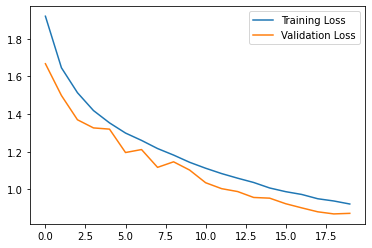

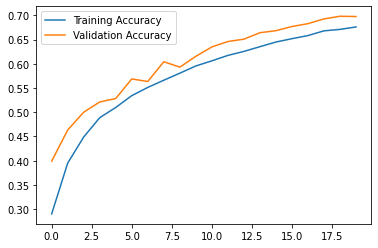

In [ ]:
# Plotting deep convolutional network

keys = history5.history.keys()
loss = history5.history['loss']
accuracy = history5.history['accuracy']
val_loss = history5.history['val_loss']
val_accuracy =  history5.history['val_accuracy']

plt.figure()
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.figure()
plt.plot(accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy") 
plt.legend()
print(model5.evaluate(x_test, y_test, verbose=0))